<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0307_Mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN 실습

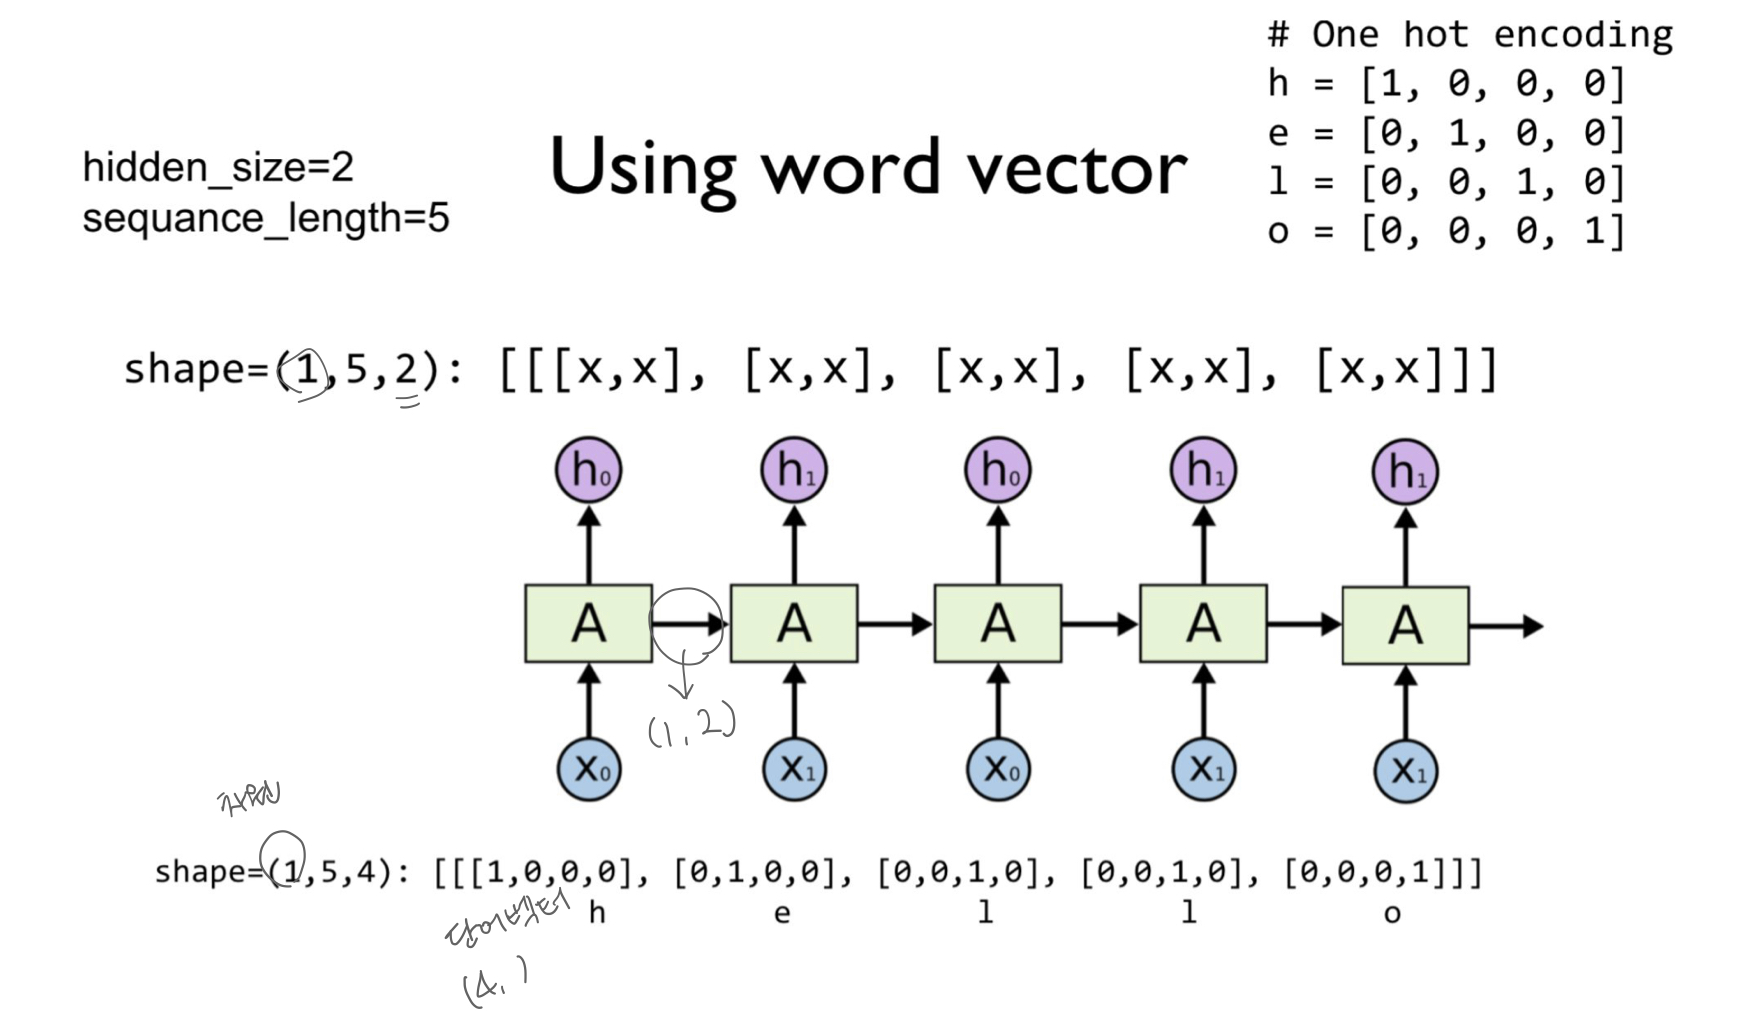

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

tf.random.set_seed(42) # 랜덤 변수 초기 상태 유지

In [2]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [3]:
x_data = np.array([[h]], dtype=np.float32)
x_data

array([[[1., 0., 0., 0.]]], dtype=float32)

In [4]:
x_data.shape

(1, 1, 4)

In [5]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data.shape) # sample의 개수, 문장에 들어있는 단어의 개수, embedding 사이즈
x_data

(1, 5, 4)


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)

In [6]:
hidden_size = 2
cell = layers.SimpleRNNCell(hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # 구조를 만든다
outputs, state = rnn(x_data)

print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape))
print('outputs : {} \t\t\tshape : {}'.format(outputs, outputs.shape))
print('state : {} \t\t\tshape : {}'.format(state, state.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] 			shape : (1, 5, 4)
outputs : [[[ 0.31773362 -0.11744198]
  [-0.32728755 -0.3856686 ]
  [-0.88101393  0.5405645 ]
  [-0.5346198   0.8732985 ]
  [ 0.83859164  0.89698803]]] 			shape : (1, 5, 2)
state : [[0.83859164 0.89698803]] 			shape : (1, 2)


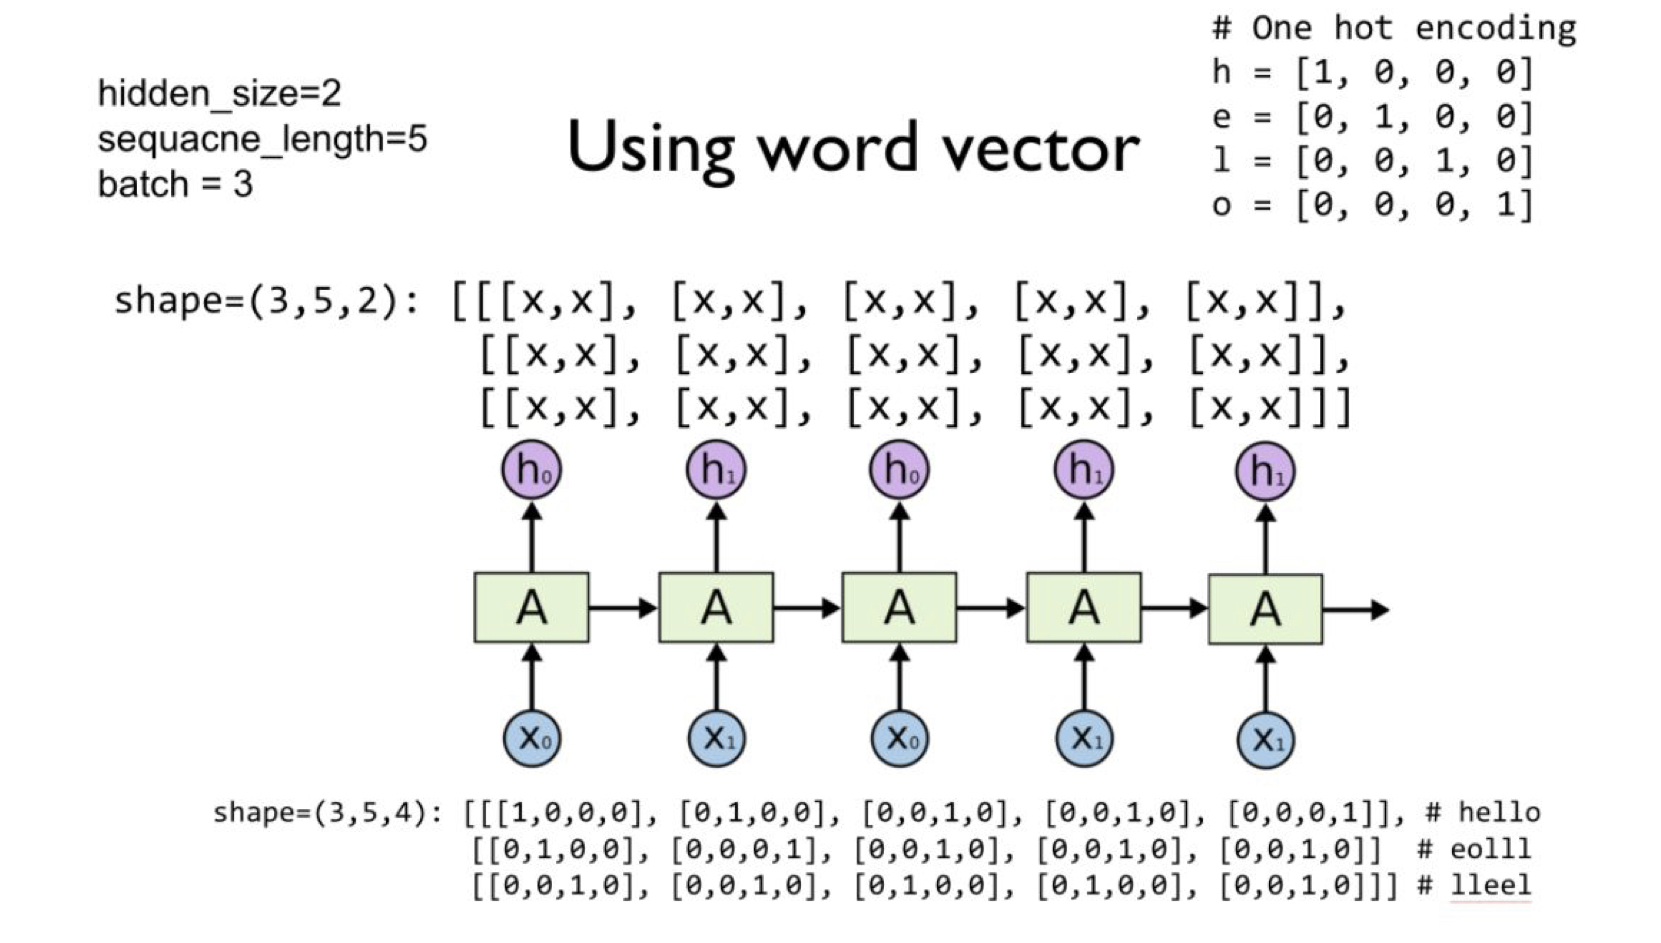

In [8]:
x_data = np.array([[h, e, l, l, o], [e, o, l, l, l], [l, l, e, e, l]], dtype=np.float32)
x_data

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [9]:
hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, state = rnn(x_data)

print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape))
print('outputs : {} \t\t\tshape : {}'.format(outputs, outputs.shape))
print('state : {} \t\t\tshape : {}'.format(state, state.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]] 			shape : (3, 5, 4)
outputs : [[[ 0.44843182  0.251574  ]
  [-0.42299843 -0.3193183 ]
  [-0.46304917 -0.1542216 ]
  [-0.43075916 -0.3099445 ]
  [-0.8806396  -0.7064807 ]]

 [[-0.74660105 -0.30380863]
  [-0.9297106  -0.77423507]
  [-0.82115084  0.01547958]
  [-0.6048624  -0.56207055]
  [-0.6494298  -0.02352885]]

 [[ 0.02127207 -0.2397339 ]
  [-0.06996572 -0.02182489]
  [-0.7768577  -0.31537652]
  [-0.94681656 -0.37214243]
  [-0.7576277  -0.33587843]]] 			shape : (3, 5, 2)
state : [[-0.8806396  -0.7064807 ]
 [-0.6494298  -0.02352885]
 [-0.7576277  -0.33587843]] 			shape : (3, 2)


In [10]:
idx2char = ['토', '마', '를', '먹', '자']

x_data = [[0, 0, 1, 2, 4, 3]] # 토 토 마 를 자 먹
y_data = [[0, 1, 0, 2, 3, 4]] # 토 마 토 를 먹 자

num_class = 5 # 클래스 개수 - '토, 마, 를, 먹, 자'
input_dim = 5 # word embedding dimension
sequence_length = 6
learning_rate = 0.1

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_class)
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_class)

x_one_hot, y_one_hot

(array([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0.]]], dtype=float32), array([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]], dtype=float32))

In [11]:
x_one_hot.shape, y_one_hot.shape

((1, 6, 5), (1, 6, 5))

In [14]:
model = tf.keras.Sequential()
cell = layers.SimpleRNNCell(units=5, input_shape=(sequence_length, input_dim))
model.add(layers.RNN(cell=cell, return_sequences=True, return_state=False, input_shape=(sequence_length, input_dim)))
model.add(layers.TimeDistributed(layers.Dense(units=num_class, activation='softmax')))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy',
                                                 metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_3 (RNN)                 (None, 6, 5)              55        
                                                                 
 time_distributed_2 (TimeDis  (None, 6, 5)             30        
 tributed)                                                       
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_one_hot, y_one_hot, epochs=10)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.6624 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 1.3668 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 14ms/step - loss: 1.0889 - accuracy: 0.8333
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 0.8864 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 0.7257 - accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 0s 18ms/step - loss: 0.5843 - accuracy: 0.8333
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 0.4692 - accuracy: 0.8333
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.3793 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 0.3064 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 18ms/step - loss: 0.2421 - accuracy: 1.0000


In [16]:
pred = model.predict(x_one_hot)
pred

array([[[6.2394679e-01, 2.4849766e-01, 2.9895853e-02, 6.8708315e-02,
         2.8951326e-02],
        [2.1055861e-01, 7.3723090e-01, 9.6119838e-03, 1.7903291e-03,
         4.0808126e-02],
        [9.1043758e-01, 7.9738289e-02, 4.1643488e-03, 5.0933999e-03,
         5.6643813e-04],
        [2.8215105e-02, 9.2653958e-03, 9.3833071e-01, 7.5233686e-03,
         1.6665414e-02],
        [4.6821695e-02, 1.1304580e-03, 4.0482702e-03, 9.4303727e-01,
         4.9623200e-03],
        [1.0273825e-02, 5.1165048e-02, 2.2448402e-02, 2.5785286e-02,
         8.9032739e-01]]], dtype=float32)

In [17]:
pred.shape

(1, 6, 5)

In [22]:
for i, word in enumerate(pred):
    print(" ".join([idx2char[c] for c in np.argmax(word, axis=1)])) # 입력과 출력이 6

토 마 토 를 먹 자


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['i love my dog', 'I, love my cat', 'You love my dog!']

tokenizer = Tokenizer() # vocabalary 생성
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences) # 단어가 가지는 인덱스

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [5]:
from os import truncate
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
print(padded)

[[4 2 1 3 0]
 [4 2 1 6 0]
 [5 2 1 3 0]
 [7 5 8 1 3]]


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


In [9]:
test_data = ['i really love my dog', 'my dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq, maxlen=5, padding='post', truncating='post')
print(padded)

[[5 1 3 2 4]
 [2 4 1 2 1]]


In [10]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.random.set_seed(42)

In [11]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSX955Z/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSX955Z/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSX955Z/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [12]:
train_data, test_data = imdb['train'], imdb['test']

In [13]:
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [16]:
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

for s, l in train_data:
    train_sentences.append(s.numpy().decode('utf-8'))
    train_labels.append(l.numpy())
    
for s, l in test_data:
    test_sentences.append(s.numpy().decode('utf-8'))
    test_labels.append(l.numpy())

In [17]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [18]:
len(train_sentences), len(train_sentences[0])

(25000, 709)

In [19]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [21]:
len(train_sentences[0].split())

116

In [20]:
len(test_sentences), test_sentences[0]

(25000,
 "There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.")

In [23]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [25]:
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [26]:
index_word = { value: key for (key, value) in word_index.items()}
index_word[1]

'<oov>'

In [28]:
padded[0]

array([   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
          1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
        154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
         58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
         12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
       1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
       2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
        117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
          9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
        242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
       1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10],
      dtype=int32)

In [31]:
def decode_review(text):
    return " ".join([index_word.get(i, '?') for i in text])

In [32]:
decode_review(padded[0])

"? ? ? this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it"

In [33]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [46]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [47]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padd = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [48]:
num_epoch = 10
hist = model.fit(padded, train_labels, validation_data=(test_padd, test_labels), epochs=num_epoch)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5645 - accuracy: 0.7478 - val_loss: 0.4209 - val_accuracy: 0.8151
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3364 - accuracy: 0.8592 - val_loss: 0.3671 - val_accuracy: 0.8369
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2737 - accuracy: 0.8876 - val_loss: 0.3690 - val_accuracy: 0.8364
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2387 - accuracy: 0.9050 - val_loss: 0.3804 - val_accuracy: 0.8358
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2117 - accuracy: 0.9195 - val_loss: 0.4033 - val_accuracy: 0.8310
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1913 - accuracy: 0.9288 - val_loss: 0.4496 - val_accuracy: 0.8169
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1736 - accuracy: 0.9383 - val_loss: 0.4601 - val_accuracy: 0.8220
Epo

In [49]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
weights.shape

(10000, 16)

In [50]:
len(embedding_layer.get_weights())

1

In [51]:
index_word[2]

'the'

In [52]:
weights[2] # the의 word vector

array([-0.11199885,  0.01624665,  0.08125349,  0.00773452, -0.06231773,
        0.1671157 ,  0.05791168, -0.00412419,  0.07413722, -0.03225589,
       -0.32243818,  0.10088293, -0.28117827,  0.10743488,  0.04018988,
        0.09978058], dtype=float32)

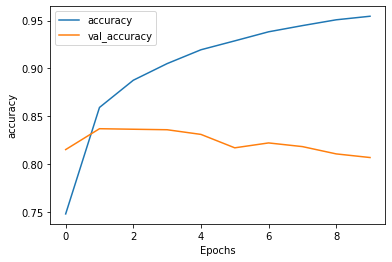

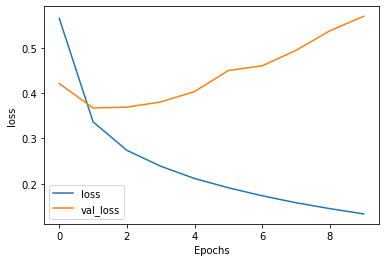

In [53]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')